In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot  as plt
import  seaborn as sns

from sklearn  import  preprocessing
import keras 
import tensorflow  as tf


In [2]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head(4)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222


In [3]:
ipl.tail(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [4]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [5]:
ipl.isnull()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76010,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76011,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
76012,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
ipl.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


C:\Users\user\AppData\Local\Temp\ipykernel_16796\3125921476.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_count.values,y=matches_count.index,palette="Set2")


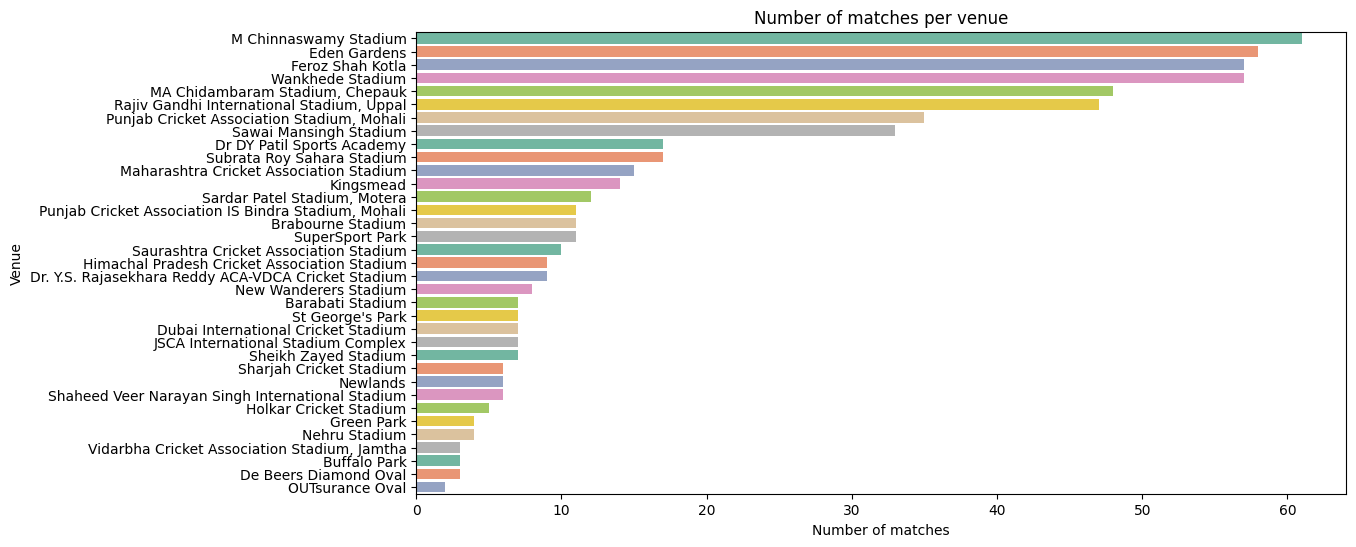

In [7]:
data = ipl.copy()
matches_per_venue = data[['mid','venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=matches_count.values,y=matches_count.index,palette="Set2")
plt.title("Number of matches per venue")
plt.xlabel("Number of matches")
plt.ylabel("Venue")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16796\2691286203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_by_batsman.values,y=runs_by_batsman.index,palette="pastel")


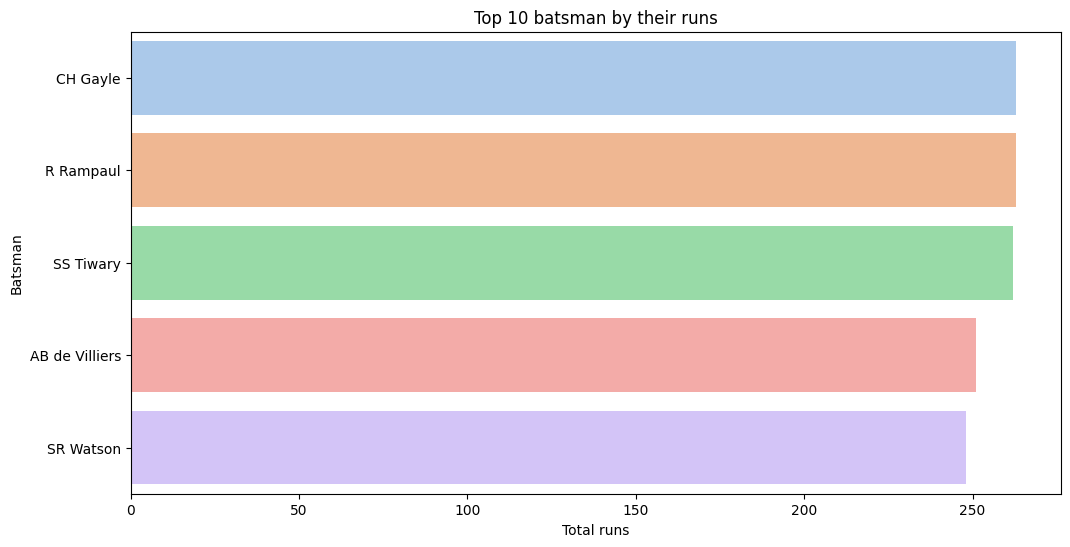

In [8]:
runs_by_batsman = data.groupby('batsman')['runs'].max().sort_values(ascending=False).head(5)
plt.figure(figsize=(12,6))
sns.barplot(x=runs_by_batsman.values,y=runs_by_batsman.index,palette="pastel")
plt.title("Top 10 batsman by their runs")
plt.xlabel("Total runs")
plt.ylabel("Batsman")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16796\3905465611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_by_bowler.values,y=wickets_by_bowler.index,palette='muted')


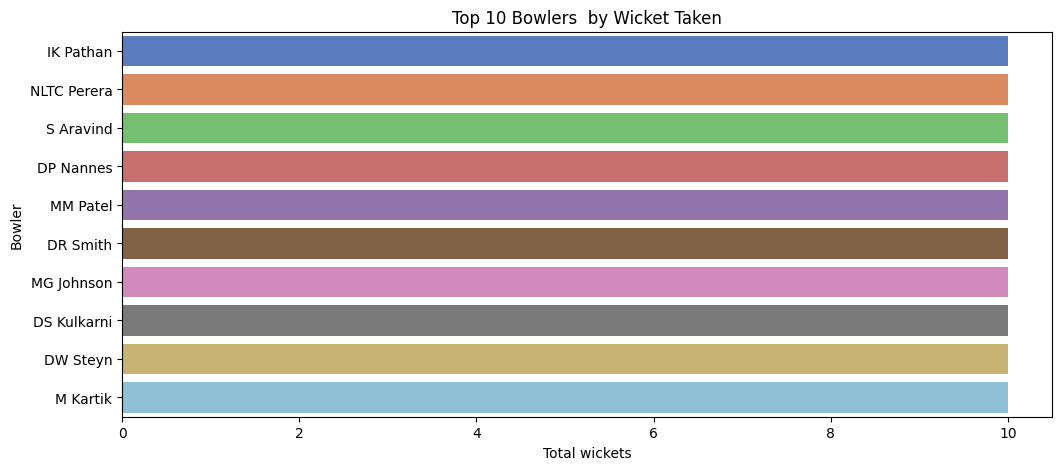

In [9]:
wickets_by_bowler = data.groupby('bowler')['wickets'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=wickets_by_bowler.values,y=wickets_by_bowler.index,palette='muted')
plt.title("Top 10 Bowlers  by Wicket Taken")
plt.xlabel("Total wickets")
plt.ylabel("Bowler")
plt.show()

In [10]:
from sklearn.preprocessing  import  LabelEncoder

In [11]:
cat_logs = ['bat_team','bowl_team','venue','batsman','bowler']
data_encoded = data.copy()
label_encoders = {}
for col in cat_logs:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

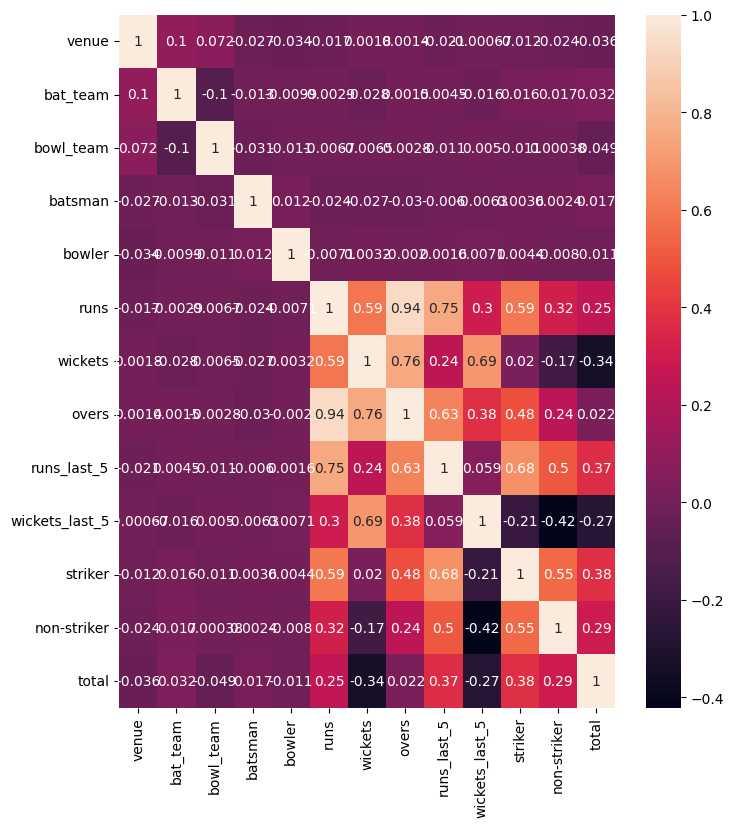

In [12]:
data_corr = data_encoded.drop(columns=['date','mid'],axis=1)
plt.figure(figsize=(8,9))
sns.heatmap(data_corr.corr(),annot=True)
plt.show()

In [13]:
feature_cols = ['bat_team','bowl_team','venue','runs','wickets','overs','striker','batsman','bowler']
X = data_encoded[feature_cols]
y = data_encoded['total']

from sklearn.model_selection import train_test_split
X_train, X_test,y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [15]:
model = keras.Sequential([
    keras.layers.Input (shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(216,activation='relu'),
    keras.layers.Dense(1,activation='linear')
])

huber_loss =  tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam',loss=huber_loss)

In [16]:
model.fit(X_train_scaled,y_train,epochs=10,batch_size=64,validation_data=(X_test_scaled,y_test))

Epoch 1/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 50.0947 - val_loss: 14.7117
Epoch 2/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 15.0800 - val_loss: 14.3183
Epoch 3/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14.6485 - val_loss: 14.1985
Epoch 4/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 14.6280 - val_loss: 14.0654
Epoch 5/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 14.6176 - val_loss: 14.0205
Epoch 6/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 14.3340 - val_loss: 13.9566
Epoch 7/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 14.2185 - val_loss: 13.9594
Epoch 8/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 14.3443 - val_loss: 14.3006
Epoch 9/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 14.2693 - val_loss: 13.8113
Epoch 10/10
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 14.3360 - val_loss: 13.7761


<Axes: >

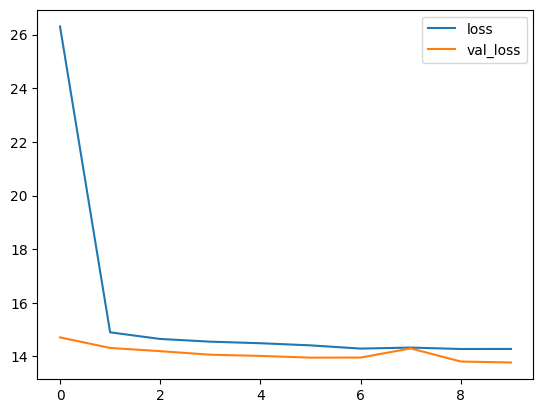

In [18]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [19]:
predication = model.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_absolute_error(y_test,predication)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


14.266660690307617

In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display ,clear_output
import warnings
warnings.filterwarnings('ignore')

def create_dropdown(description, options):
    return widgets.Dropdown(options=options,description=description,style ={'description_width':'initial'})

def create_input(cls,description,value):
    return cls(value=value,description=description,style={"description_width":'initial'})


venue = create_dropdown('Select Venue:',list(label_encoders['venue'].classes_))
batting_team = create_dropdown("Select Batting Team:",list(label_encoders['bat_team'].classes_))
bowling_team =create_dropdown("Select bowling Team:",list(label_encoders['bat_team'].classes_))
striker =create_dropdown("select Striker:",list(label_encoders['batsman'].classes_)) 
bowler =  create_dropdown("Select Bolwer:",list(label_encoders['bowler'].classes_))

runs = create_input(widgets.IntText,'Runs',0)
wickets = create_input(widgets.IntText,'Wickets:',0)
overs = create_input(widgets.FloatText,'Overs:',0.0)
striker_ind = create_input(widgets.IntText,'Striker:',0)

predict_button = widgets.Button(description="Predict Score")
output =widgets.Output()



def predict_score(b):
    with output:
        clear_output()
        enc = lambda key,val:label_encoders[key].transform([val])[0]
        features =[
            enc('bat_team',batting_team.value),
            enc('bowl_team',bowling_team.value),
            enc('venue',venue.value),
            runs.value,wickets.value,overs.value,
            striker_ind.value,
            enc('batsman',striker.value),
            enc('bowler',bowler.value)
        ]

        input_array = scaler.transform([features])
        predicated = model.predict(input_array)[0]
        print(f" Predicated total  Runs:{int(predicated)}")


predict_button.on_click(predict_score)


display(venue,batting_team,bowling_team,striker,bowler,runs,wickets,overs,striker_ind,predict_button,output)

Dropdown(description='Select Venue:', options=('Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park', 'De Be…

Dropdown(description='Select Batting Team:', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredev…

Dropdown(description='Select bowling Team:', options=('Chennai Super Kings', 'Deccan Chargers', 'Delhi Daredev…

Dropdown(description='select Striker:', options=('A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary', 'A…

Dropdown(description='Select Bolwer:', options=('A Ashish Reddy', 'A Chandila', 'A Choudhary', 'A Flintoff', '…

IntText(value=0, description='Runs', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Wickets:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Overs:', style=DescriptionStyle(description_width='initial'))

IntText(value=0, description='Striker:', style=DescriptionStyle(description_width='initial'))

Button(description='Predict Score', style=ButtonStyle())

Output()